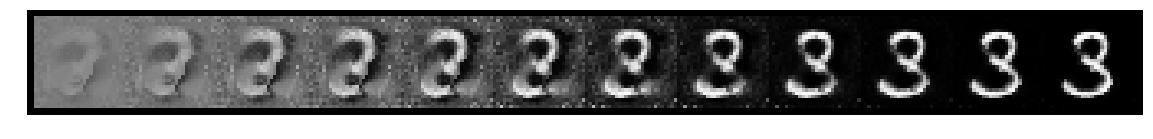

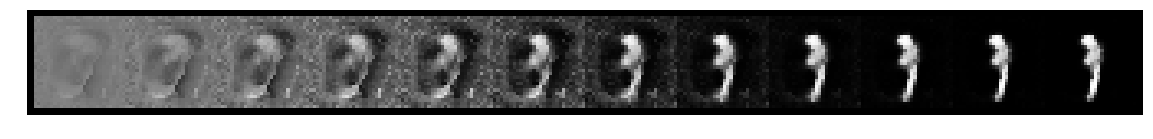

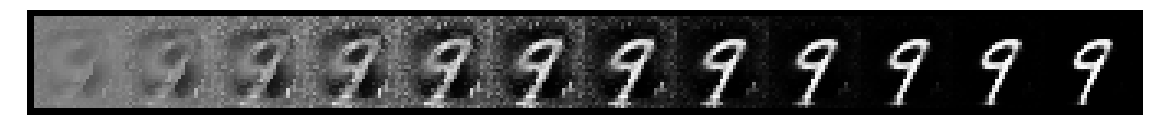

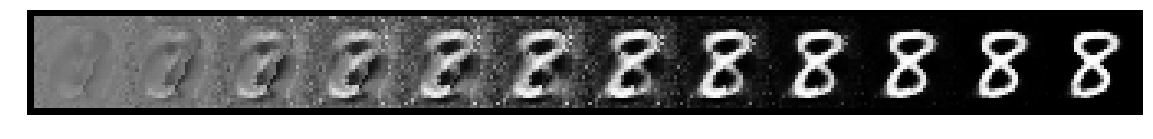

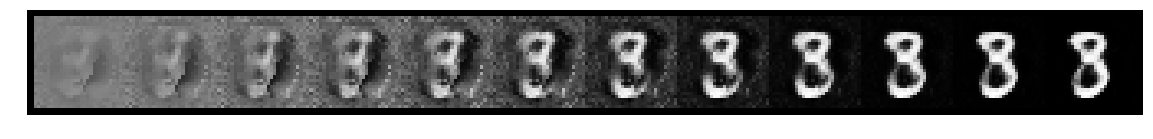

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision

from models.ame import AME
from models.vae import VAE

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.axis('off')

# initialize hyperparams
bsz = 100
ninp = 784
mid_size = 400
latent_size = 100

# load pre-trained models
with open('pretrained_networks/avme.pt', 'rb') as f:
    ame_dec_v = torch.load(f)
    
with open('pretrained_networks/avme_enc.pt', 'rb') as f:
    ame_enc_v = torch.load(f)
    
# lists for output series
canvas_list_1 = []
canvas_list_2 = []
canvas_list_3 = []
canvas_list_4 = []
canvas_list_5 = []

# initialize canvas
canvas = Variable(torch.zeros(bsz,784))
output = Variable(torch.zeros(bsz,784))

# initialize LSTM hidden state
h_dec_1 = (Variable(torch.zeros(bsz,mid_size)), Variable(torch.zeros(bsz,mid_size)))
h_dec_2 = (Variable(torch.zeros(bsz,ninp)), Variable(torch.zeros(bsz,ninp)))

# generate image series of length 12
for i in range(12):
    sample = Variable(torch.randn(bsz,latent_size))
    output, h_dec_1, h_dec_2 = ame_dec_v(sample, h_dec_1, h_dec_2)
    canvas = canvas.add(output)
    canvas_list_1.append(canvas.sigmoid().view(bsz,1,28,28).data[:1])
    canvas_list_2.append(canvas.sigmoid().view(bsz,1,28,28).data[1:2])
    canvas_list_3.append(canvas.sigmoid().view(bsz,1,28,28).data[2:3])
    canvas_list_4.append(canvas.sigmoid().view(bsz,1,28,28).data[3:4])
    canvas_list_5.append(canvas.sigmoid().view(bsz,1,28,28).data[4:5])

# matplotlib doesn't like when I do this iteratively
pic = torch.cat(canvas_list_1,3)
plt.figure(figsize=(20,10))
imshow(torchvision.utils.make_grid(pic))
pic = torch.cat(canvas_list_2,3)
plt.figure(figsize=(20,10))
imshow(torchvision.utils.make_grid(pic))
pic = torch.cat(canvas_list_3,3)
plt.figure(figsize=(20,10))
imshow(torchvision.utils.make_grid(pic))
pic = torch.cat(canvas_list_4,3)
plt.figure(figsize=(20,10))
imshow(torchvision.utils.make_grid(pic))
pic = torch.cat(canvas_list_5,3)
plt.figure(figsize=(20,10))
imshow(torchvision.utils.make_grid(pic))